<a href="https://colab.research.google.com/github/Nomade25/Mackenzie/blob/main/DesafioTitanic_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings ("ignore")

 
import matplotlib.pyplot as graph
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = 'DejaVu Sans'
graph.rcParams["font.size"] = '12'
graph.rcParams['image.cmap'] = 'rainbow'
 
 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
dataset_titanic = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Arquivos/train_titanic.csv") 

In [3]:
dataset_titanic.head()
# Temos:
# Id do Passageiro
# SObreviventes (varivavel dependente)
# Pclass (classe do passageiro)
# Name, Sex, Age
# SibSP  relação familiar: sibsp (sobrinho, sobrinha, irmãos e meios irmão) | Spouse (marido e esposa)
# Parch relação familiar: parent(mãe e pai) | Child (filho ou filha e enteados)
# Ticket (nº do ticket)
# fare tarifa do passageiro
# Cabin nº da cabine
# Embarked porto que o passageiro embarcou




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


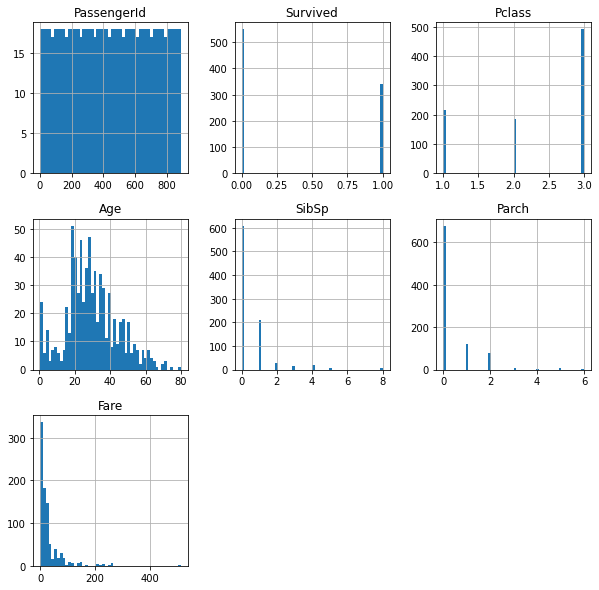

In [4]:
# Olhando o dataset completo

dataset_titanic.hist(bins=50, figsize=(10,10))
plt.show()

In [5]:
# quais as colunas com valores vazios ou nulos?

(dataset_titanic.isnull().sum()).sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [6]:
# Verificando tipos de atributo
# Temos varios dados do tipo float que podemos normatizar

dataset_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# Agora vou pegar a idade (age) e substituir nulo pela média
dataset_titanic01 = dataset_titanic.fillna(dataset_titanic['Age'].mean())

dataset_titanic01.head()

# Podemos percerber abaixo que para esse novo dataframe idade agora está vazio

(dataset_titanic01.isnull().sum()).sort_values(ascending=False)


Embarked       0
Cabin          0
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

In [8]:
dataset_titanic01.shape

(891, 12)

In [9]:
# podemos verificar o resumo desses dados
dataset_titanic01.describe()

# Todos atributos contem 891 instâncias
# a média de idade de passageiros  sobreviventes é 29
# PClass são dividos por Alta, Classe média e baixa, mostra 35% estão no primeiro quartil
# SibSp define a relação de class entre familiares sobreviventes (irmãos, irmãs, meios, marido e esposas)
# Parch define a relação de classe entre familiares sobreviventes entre (pai, mãe, filho, filha e etc...)
# sexo dos passageiros sobreviventes
# fare valor que o passgeiro pagou

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Existe alguma correlação dos atributos com sobreviventes? vamos pesquisar...

corr = dataset_titanic01.corr () 
maior_corr = corr.index[abs(corr["Survived"])>0.1]
maior_corr   

# conseguimos encontra somente correlação fraca <0.10

Index(['Survived', 'Pclass', 'Fare'], dtype='object')

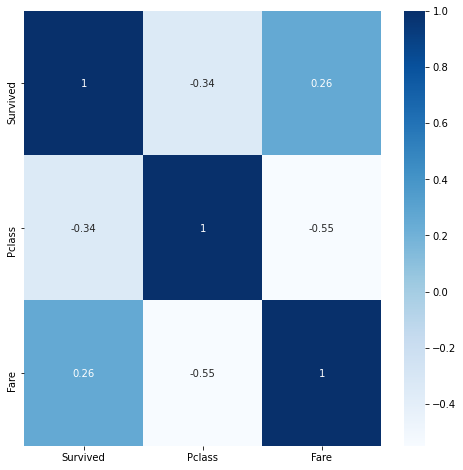

In [11]:
# Plotar o gra´fico de calor dessas variaveis 
# por enquanto vamos considerar classe dos passageiros e valor médio da tarifa
plt.figure(figsize=(8,8))
ax = sns.heatmap(dataset_titanic01[maior_corr].corr(),annot=True, cmap="Blues")
 

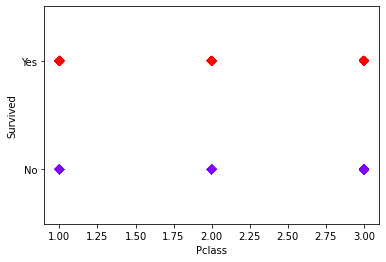

In [12]:
# vamos considerar o seguinte atributo pra regressão logistica 
# O quanto a classe o passageiro explica a sobrevivencia do mesmo

train_y = dataset_titanic01["Survived"]

train_x = dataset_titanic01["Pclass"]

graph.scatter(train_x, train_y, c = train_y, marker = 'D')

graph.yticks([0, 1], ['No', 'Yes'])
graph.ylabel("Survived")
graph.ylim([-0.5, 1.5])
graph.xlabel("Pclass")

graph.show()
# conforme podemos ver abaixo no modelo de treino os sobreviventes estão espalhado por todas as classe,
# classe não é determinante para sobreviver, mas pode ser que estatisticamente existe uma maior frequencia


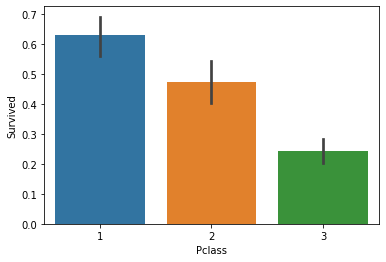

In [13]:
# Podemos plotar os sobrevivente por clase pra constatar a distribuição

sns.barplot(x="Pclass", y= "Survived", data= dataset_titanic01)

Conforme podemos ver acima, a conclusão inicial que teremos que trabalhar mais as features, para conseguir chegar numa boa regressão, vamos seguir com as trativas abaixo, pois pegando apenas o dataset direto e fazendo algumas tratativas não foi possivel chegar num resultado satisfatório.

In [14]:
# Como esta a questão dos nulos
(dataset_titanic.isnull().sum()).sort_values(ascending=False)


Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

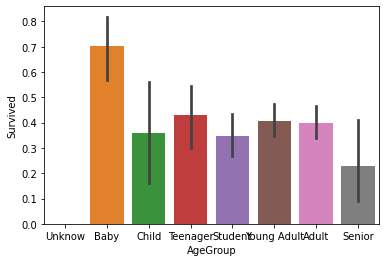

In [15]:
# vamos montar uma categorias de idade  a partir da feature Age
# e criar assim sobreviventes por faixa etária

bins= [-1,0,5,12,18,24,35,60, np.inf]
labels= ['Unknow','Baby', 'Child', 'Teenager', 'Student', 'Young Adult','Adult', 'Senior']
dataset_titanic['AgeGroup'] = pd.cut(dataset_titanic["Age"], bins, labels =labels)
sns.barplot(x="AgeGroup",y="Survived", data= dataset_titanic)
plt.show()


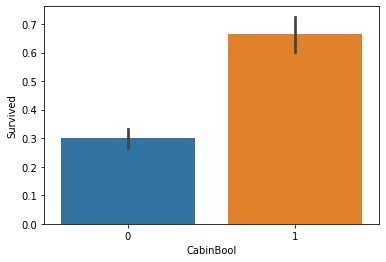

In [16]:
# Como cabine tem poucos preenchimentos tranformando em bit 0 ou 1

dataset_titanic["CabinBool"]= (dataset_titanic["Cabin"].notnull().astype('int'))

sns.barplot(x='CabinBool', y= 'Survived', data= dataset_titanic)

In [17]:
# Como estão os nulos
(dataset_titanic.isnull().sum()).sort_values(ascending=False)

Cabin          687
AgeGroup       177
Age            177
Embarked         2
CabinBool        0
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [18]:
 #Limpar dados irrelevantes agora, pois já extraimos os dados de cabine que passou 
 # a assumir CabinBool
dataset_titanic = dataset_titanic.drop(['Cabin','Ticket'],axis=1)


In [19]:
# Como está a questão dos nulos agora
(dataset_titanic.isnull().sum()).sort_values(ascending=False)

AgeGroup       177
Age            177
Embarked         2
CabinBool        0
Fare             0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [20]:
# Vmos pegar esses 2 passegeiros que o embarque esta nulo e preencher com algum valor mais constante
dataset_titanic = dataset_titanic.fillna({"Embarked": "S"})

# Agora mapeando esses valores para númerico
Embarked ={"S":1,"C":2,"Q":3}
dataset_titanic['Embarked'] = dataset_titanic['Embarked'].map(Embarked)

In [21]:
# Como está a questão dos nulos agora
(dataset_titanic.isnull().sum()).sort_values(ascending=False)

AgeGroup       177
Age            177
CabinBool        0
Embarked         0
Fare             0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [22]:
# Olhando novamente o dataframe
dataset_titanic.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,Student,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,Young Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,Young Adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,Young Adult,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,3,NaN,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,1,Adult,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,1,Baby,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,1,Young Adult,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,2,Teenager,0


In [23]:
# Vamos mudar os dados categorigos de sexo para numerico
sex_mapa = {"male":0, "female":1}
dataset_titanic['Sex'] = dataset_titanic['Sex'].map(sex_mapa)
dataset_titanic.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,1,Student,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,2,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,1,Young Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,1,Young Adult,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,1,Young Adult,0
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,8.4583,3,NaN,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,51.8625,1,Adult,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,21.0750,1,Baby,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,11.1333,1,Young Adult,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,30.0708,2,Teenager,0


In [24]:
# Podemos pegar a feature nome e criar alguma feateure a partir do nome de tramento
# Criando uma nova feature a partir do titulo (nome de tratamento)
dataset_titanic ['Titulo'] = dataset_titanic['Name'].str.extract('([A-Za-z]+)\.',expand=False) 

pd.crosstab(dataset_titanic['Titulo'],dataset_titanic['Sex'])

# Abaixo o count por titulo com sexo

Sex,0,1
Titulo,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [25]:
 #Agrupando os titulos menos comum
dataset_titanic['Titulo'] = dataset_titanic['Titulo'].replace(['Lady','Capt','Col','Don','Dr','Major','Rev','Jonkheer','Dona'],'Rare') 
dataset_titanic['Titulo'] = dataset_titanic['Titulo'].replace(['Countess','Lady','Sir'],'Royal')
dataset_titanic['Titulo'] = dataset_titanic['Titulo'].replace('Mlle','Miss')
dataset_titanic['Titulo'] = dataset_titanic['Titulo'].replace('Ms','Miss')
dataset_titanic['Titulo'] = dataset_titanic['Titulo'].replace('Mme','Mrs')

dataset_titanic[['Titulo','Survived']].groupby(['Titulo'], as_index=False).mean()

# Agrupando os titulos forma de tratamento por % sobreviventes

,Titulo,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


Tranformando atributos agora para numerico

In [26]:
# Transformar titulo em numerico
Titulo = {"Mr":1,"Miss":2, "Mrs":3, "Master":4, "Royal":5, "Rare":6}
dataset_titanic['Titulo']= dataset_titanic['Titulo'].map(Titulo)
dataset_titanic['Titulo'] = dataset_titanic['Titulo'].fillna(0)

In [27]:
# transformar AgeGroup para numerico

AgeGroup = {"Unknow":0,"Baby":1, "Child":2, "Teenager":3, "Student":4, "Young Adult":5,"Adult":6, "Senior":7}
dataset_titanic['AgeGroup']= dataset_titanic['AgeGroup'].map(AgeGroup)

In [28]:
# Como está a questão dos nulos agora
(dataset_titanic.isnull().sum()).sort_values(ascending=False)

AgeGroup       177
Age            177
Titulo           0
CabinBool        0
Embarked         0
Fare             0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [29]:
# Agora que foi criados as novas features, elimnando valores ausentes

dataset_titanic =  dataset_titanic.dropna(subset =['Age'])

In [30]:
# Como está a questão dos nulos agora
(dataset_titanic.isnull().sum()).sort_values(ascending=False)

Titulo         0
CabinBool      0
AgeGroup       0
Embarked       0
Fare           0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

In [31]:
# Eliminando features com pouco relevancia
dataset_titanic = dataset_titanic.drop(['Name', 'PassengerId'], axis =1)

# Abaixo ficamos apenas com númericos

In [32]:
dataset_titanic['AgeGroup'] = dataset_titanic['AgeGroup'].astype('int64')
dataset_titanic['Age'] = dataset_titanic['Age'].astype('int64')
dataset_titanic['Fare'] = dataset_titanic['Fare'].astype('int64')

In [33]:
dataset_titanic.dtypes

Survived     int64
Pclass       int64
Sex          int64
Age          int64
SibSp        int64
Parch        int64
Fare         int64
Embarked     int64
AgeGroup     int64
CabinBool    int64
Titulo       int64
dtype: object

In [34]:
dataset_titanic.head()
# Sobraram as seguintes features
# Survived = Variavel dependente
# PClass = Classe que o passageiro embarcou
# sex = 0 homem 1 mulher
# Idade = idade do passageiro
# SibSP = relação familiar
# Parch = valor pago no ticket
# Embarked = porto que foi embarcado
# AgeGroup = Faixa etária por grupo
# CabinBool = os atributos que existia numero da cabine foi defini 0 e 1 se continha ou não
# Titulo = forma de tratamento do passageiro extraido da coluna nome 


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Titulo
0,0,3,0,22,1,0,7,1,4,0,1
1,1,1,1,38,1,0,71,2,6,1,3
2,1,3,1,26,0,0,7,1,5,0,2
3,1,1,1,35,1,0,53,1,5,1,3
4,0,3,0,35,0,0,8,1,5,0,1


In [35]:
# Analisando o dataframe
dataset_titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Titulo
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.365546,29.679272,0.512605,0.431373,34.287115,1.260504,4.593838,0.259104,1.816527
std,0.491460,0.838250,0.481921,14.536483,0.929783,0.853289,52.929365,0.521012,1.456336,0.438450,1.163352
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.000000,1.000000,4.000000,0.000000,1.000000
50%,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.000000,1.000000,5.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.000000,1.000000,6.000000,1.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.000000,3.000000,7.000000,1.000000,6.000000


Aqui vamos rodar a regressão logistica !

In [36]:
# Train test split considerando todas varivaveis

predictors = dataset_titanic.drop(["Survived"], axis =1)
target = dataset_titanic ["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size =0.2, random_state =0 )

In [37]:

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val)* 100, 2)
print(acc_logreg)

81.82


In [38]:
# Rodando o modelo removendo valor do ticket e tarifa

predictors = dataset_titanic.drop(["Survived","Parch", "Fare"], axis =1)
target = dataset_titanic ["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size =0.2, random_state =0 )



In [39]:
# Regressão logistica
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val)* 100, 2)
print(acc_logreg)

83.92


Podemos ver acima que com a remoção de algumas features a acuracia do modelo subiu de 81,82 para 83,92.